# Jupyter Notebook Purpose
- read the .csv.gz compressed file dataset into pandas DataFrame and perform machine learning to see if predictions can be made as to the nature of TFS incident types
    - several categories and continuous variables will be explored to observe if one can predict

## Group 10 Members

- ### A. Nidhi Punja - [Email](mailto:npunja@uwaterloo.ca)
- ### B. Judith Roth - [Email](mailto:j5roth@uwaterloo.ca)
- ### C. Iman Dordizadeh Basirabad - [Email](mailto:idordiza@uwaterloo.ca)
- ### D. Daniel Adam Cebula - [Email](mailto:dacebula@uwaterloo.ca)
- ### E. Cynthia Fung - [Email](mailto:c27fung@uwaterloo.ca)
- ### F. Ben Klassen - [Email](mailto:b6klasse@uwaterloo.ca)

In [1]:
# Group 10 Collaborators
COLLABORATORS = ["Nidhi Punja",
                 "Judith Roth",
                 "Iman Dordizadeh Basirabad",
                 "Daniel Adam Cebula",
                 "Cynthia Fung",
                 "Ben Klassen"]

# Group 10 Members
for _ in COLLABORATORS:
    print(f"Group 10 Member: {_:->30}")

Group 10 Member: -------------------Nidhi Punja
Group 10 Member: -------------------Judith Roth
Group 10 Member: -----Iman Dordizadeh Basirabad
Group 10 Member: ------------Daniel Adam Cebula
Group 10 Member: ------------------Cynthia Fung
Group 10 Member: -------------------Ben Klassen


# Table of Contents

## 1. [Python Dependecies](#1.-Python-Libraries-and-Dependencies[1,2,3,4,5,6])
___
## 2. [Folder Creation](#2.-Folder-Creation-for-Data-Analyses-and-Visualization)
___
## 3. [Read in the Data](#3.-Read-in-DataSet-as-a-Pandas-DataFrame)
___
## 4. [K Nearest Neighbours Machine Learning](#4.-K-Nearest-Neighbours-Machine-Learning-TFS-Incident-type-prediction)
## 4a. [Preliminary](#4a.-Preliminary-Data-Preparation-and-KNN-Model-Analysis)
## 4b. [Refined](#4b.-KNN-Model-Refinement)
___
## 5. [References](#5.-Jupyter-Notebook-References)
___

# 1. Python Libraries and Dependencies<sup>[1,2,3,4,5,6]</sup>

In [2]:
# Python Modules for Miscellaneous reasons
import os        # portable way to use operating system functionalities
import datetime  # python classes for manipulating dates and times
import dateutil  # powerful extensions to standard datetime Python module
import re        # used for Python regex library
from IPython.display import display # use this to see the entire DataFrame in the right format
from create_folder import create_folder # create folder function that I have defined and placed in create_folder.py file
import warnings  # suppress warnings from various Python libraries
import math      # import python math library for various functions
import string    # use this library to remove punctuation
import KNN_Functions as ML_IS_FUN # some functions I wrote to clean up the jupyter notebook a bit

In [3]:
# DATA ANALYSIS / VISUALIZATION Python Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# some matplotlib libraries for formatting
import matplotlib.ticker as tick

# 2. Folder Creation for Data Analyses and Visualization
- generate a folder that will hold data analyses / visualizations

In [5]:
# get a connection to the major directory holding the data / metadata of the DataFrame
PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name="PROCESSED_ZIPPED")

# generate a images folder and a analyses folder to hold all relevant information
IMAGES_DIRECTORY = create_folder(folder_name="IMAGES")
ANALYSES_DIRECTORY = create_folder(folder_name="ANALYSES")

# get folders for fire incidents, toronto weather and fire station location data
FIRE_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "FIRE_INCIDENTS"))
WEATHER_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "TORONTO_WEATHER"))
STATIONS_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "FIRE_STATIONS"))

# 3. Read in DataSet as a Pandas DataFrame
- DataSet is a compressed file (.csv.bz2)
- DataSet Metadata is a .csv file

In [6]:
# read in the metadata from .csv into memory
# use this metatdata to explain the columns
df_metadata = pd.read_csv(
    os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET_METADATA.csv"),
    index_col="COLUMN_NAME")

# display it
with pd.option_context('display.max_colwidth', 300):
    display(df_metadata)

,COLUMN_DESCRIPTION
COLUMN_NAME,
INCIDENT_NUM,Toronto Fire Services (TFS) incident number. Used as index for the DataFrame because it is unique for each call.
DATETIME,"Year, Month, Day, Hour, Minute, Second of when TFS was notified of the incident (alarm)."
MINUTES_ARRIVAL,Minutes it took for the first unit to arrive (after alarm).
MINUTES_LEAVE,Minutes it took for the first unit to leave (after arrival).
FIRE_STATION,Number of TFS Station where incident occurred.
FIRE_STATION_CLOSEST,Number of closest (by smallest Haversine formula distance calculation) TFS Station where incident occurred.
NAME,Name of column FIRE_STATION TFS Fire Station.
ADDRESS,Address of column FIRE_STATION TFS Fire Station.
LATITUDE_STATION,Latitude (Decimal Degrees) of column FIRE_STATION TFS Fire Station.


In [7]:
# read the merged DataFrame from .csv.bz2 file into DataFrame
PATH_MERGED_CSV_BZ2 = os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET.csv.bz2")

# pandas DataFrame generated and is referenced by df variable name
df = pd.read_csv(PATH_MERGED_CSV_BZ2,
                 compression='bz2', index_col="INCIDENT_NUM", parse_dates=["DATETIME"])

# display it
with pd.option_context('display.max_columns', None):
    display(df.head())

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,MUN_NAME,CAD_TYPE,CAD_CALL_TYPE,FINAL_TYPE,ALARM_LEVEL,CALL_SOURCE,PERSONS_RESCUED,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342.0,342.0,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.679099,-79.461761,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000011,2011-01-01 00:03:55,5.117,6.183,131.0,131.0,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),former Toronto,Medical,Carbon Monoxide,89 - Other Medical,1,01 - 911,0.0,43.726342,-79.396401,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000012,2011-01-01 00:05:03,4.517,17.617,324.0,324.0,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.668548,-79.335324,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000013,2011-01-01 00:04:46,6.000,9.883,345.0,345.0,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),former Toronto,FIG - Fire - Grass/Rubbish,Emergency Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",1,01 - 911,0.0,43.657123,-79.434313,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000014,2011-01-01 00:06:07,4.933,10.133,142.0,142.0,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),North York,FAHR - Alarm Highrise Residential,Emergency Fire,"33 - Human - Malicious intent, prank",1,05 - Telephone from Monitoring Agency,0.0,43.759840,-79.516182,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0


# 4. K Nearest Neighbours Machine Learning TFS Incident type prediction
- can we predict the type of TFS incident given several categorical and continuous variables?

## 4a. Preliminary Data Preparation and KNN Model Analysis
- it was found with previous data analysis that certain columns play no role in FINAL_TYPE determinations
    - weather / climate, geospatial data, CAD_TYPE is a sub-category of CAD_CALL_TYPE
    - the vast majority of ALARM_LEVEL is 0 so it is unreliable as a metric as well as PERSONS_RESCUED
    - due to time concerns of model FIRE_STATION (categorical variable) and CAD_CALL_TYPE will not be explored 
- Features that will be explored
    - HOUR_OF_DAY (will be generated)
    - MINUTES_ARRIVAL
    - MINUTES_LEAVE
    - CALL_SOURCE
- Target is the top 10 FINAL_TYPE by count which is the TFS Fire Incident classification
- lets start with 1% of dataset to make sure the code works

In [8]:
# get the top 10 FINAL_TYPE
top_10 = [x for x in df["FINAL_TYPE"].value_counts().index[:10]]

# generate the hour of the day (24 hour format) that is rounded
df["HOUR"] = df["DATETIME"].dt.round("D").dt.hour

# slice the dataframe that is a subset of the top 10
# and columns of interest and drop all nulls
df = df.loc[df["FINAL_TYPE"].isin(top_10), ["FINAL_TYPE", "HOUR",
                                            "MINUTES_ARRIVAL", "MINUTES_LEAVE",
                                            "CALL_SOURCE"]].dropna()

# set FINAL_TYPE to be categorical
df["FINAL_TYPE"] = pd.Categorical(df["FINAL_TYPE"])

# also reset the index and remove the INCIDENT_NUM as it is too unique
df.reset_index(inplace=True)
df.drop(columns="INCIDENT_NUM", inplace=True)
# the final dataframe
df

,FINAL_TYPE,HOUR,MINUTES_ARRIVAL,MINUTES_LEAVE,CALL_SOURCE
0,89 - Other Medical,0,6.317,21.267,03 - From Ambulance
1,89 - Other Medical,0,5.117,6.183,01 - 911
2,89 - Other Medical,0,4.517,17.617,03 - From Ambulance
3,"33 - Human - Malicious intent, prank",0,4.933,10.133,05 - Telephone from Monitoring Agency
4,34 - Human - Perceived Emergency,0,7.367,8.417,01 - 911
...,...,...,...,...,...
818794,"33 - Human - Malicious intent, prank",0,4.433,6.817,05 - Telephone from Monitoring Agency
818795,89 - Other Medical,0,5.650,2.667,03 - From Ambulance
818796,89 - Other Medical,0,6.667,4.183,03 - From Ambulance
818797,89 - Other Medical,0,7.717,2.867,03 - From Ambulance


In [9]:
# take 10% of dataframe to see how long it takes
df_sample = df.sample(10000)
df_sample

,FINAL_TYPE,HOUR,MINUTES_ARRIVAL,MINUTES_LEAVE,CALL_SOURCE
396890,89 - Other Medical,0,2.983,7.883,03 - From Ambulance
689871,89 - Other Medical,0,5.383,4.550,03 - From Ambulance
257962,89 - Other Medical,0,4.650,18.483,03 - From Ambulance
714442,89 - Other Medical,0,3.917,10.183,03 - From Ambulance
69505,89 - Other Medical,0,5.967,26.667,03 - From Ambulance
...,...,...,...,...,...
433356,89 - Other Medical,0,5.317,14.633,03 - From Ambulance
71435,66 - Persons Trapped in Elevator,0,6.650,37.483,03 - From Ambulance
79416,89 - Other Medical,0,4.000,5.100,03 - From Ambulance
627744,24 - Other Cooking/toasting/smoke/steam (No Fire),0,7.083,10.917,01 - 911


In [10]:
# Generate X and y variables
X, y = ML_IS_FUN.DataFrame_to_X_and_y(df_sample)

# for Features apply pd.get_dummies() to turn categorical to
# numerical
X = pd.get_dummies(X)

len(X.columns)

13

In [11]:
# train test split and scale appropriately
# standardization is chosen with MinMaxScaler
(X_train, X_test,
 y_train, y_test, _) = ML_IS_FUN.Train_Test_Split_and_Scale(features=X, labels=y,
                                                          scaler=ML_IS_FUN.MinMaxScaler(),
                                                          random_state=42,
                                                          test_size=0.25)

In [12]:
# Fit the KNN model with the training data and number of neighbours
model = ML_IS_FUN.K_Nearest_Neighbours_Model(train_features=X_train,
                                             train_labels=y_train,
                                             k_value=5)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
# get scores and predictions from KNN model
import time
t1 = time.time()

# get scores and predictions
(train_score,
 test_score,
 train_predict,
 test_predict) = ML_IS_FUN.Scores_And_Predictions(X_train,
                                        y_train,
                                        X_test,
                                        y_test, model,
                                        prediction_flag=False)

t_delta = time.time() - t1

# it only took 1.8 seconds so 180 seconds for full sized dataset
display(t_delta)

1.5538437366485596

In [14]:
# for a given train / test split observe the opportune k value
# check odd numbered k values
# Trial Run
mean_train_scores = []
std_train_scores = []
mean_test_scores = []
std_test_scores = []
k_list = []
for k in range(1, 52, 2):
    k_list.append(k)
    agg_train_scores = []
    agg_test_scores = []
    for random_stat in range(10, 31, 10):
        df_sample = df.sample(10000, random_state=random_stat)
        X, y = ML_IS_FUN.DataFrame_to_X_and_y(df_sample)
        X = pd.get_dummies(X)
        (X_train, X_test,
         y_train, y_test, _) = ML_IS_FUN.Train_Test_Split_and_Scale(features=X, labels=y,
                                                          scaler=ML_IS_FUN.MinMaxScaler(),
                                                          random_state=random_stat,
                                                          test_size=0.25)
        t1 = time.time()
        model = ML_IS_FUN.K_Nearest_Neighbours_Model(train_features=X_train,
                                                 train_labels=y_train,
                                                 k_value=k)
        (train_score,
        test_score,
        train_predict,
        test_predict) = ML_IS_FUN.Scores_And_Predictions(X_train,
                                            y_train,
                                            X_test,
                                            y_test, model,
                                            prediction_flag=False)
        agg_train_scores.append(train_score)
        agg_test_scores.append(test_score)
        print(f"time: {round(time.time() - t1, 2)}, k value: {k}, train score: {train_score}, test score: {test_score}")
        del model, train_score, test_score
    mean_train_scores.append(np.mean(agg_train_scores))
    std_train_scores.append(np.std(agg_train_scores))
    mean_test_scores.append(np.mean(agg_test_scores))
    std_test_scores.append(np.std(agg_test_scores))
    del agg_train_scores, agg_test_scores

time: 1.44, k value: 1, train score: 0.9990666666666667, test score: 0.654
time: 1.59, k value: 1, train score: 0.9996, test score: 0.6492
time: 1.59, k value: 1, train score: 0.9997333333333334, test score: 0.6516
time: 1.7, k value: 3, train score: 0.8008, test score: 0.6616
time: 1.93, k value: 3, train score: 0.7992, test score: 0.67
time: 1.65, k value: 3, train score: 0.8022666666666667, test score: 0.666
time: 1.71, k value: 5, train score: 0.7744, test score: 0.6904
time: 1.89, k value: 5, train score: 0.7728, test score: 0.6816
time: 1.64, k value: 5, train score: 0.7733333333333333, test score: 0.6796
time: 1.7, k value: 7, train score: 0.7594666666666666, test score: 0.6868
time: 2.04, k value: 7, train score: 0.76, test score: 0.6896
time: 1.74, k value: 7, train score: 0.7592, test score: 0.6872
time: 1.64, k value: 9, train score: 0.7470666666666667, test score: 0.6904
time: 2.11, k value: 9, train score: 0.7496, test score: 0.6944
time: 1.87, k value: 9, train score: 0.7

In [15]:
# generate numpy arrays
k_list = np.array(k_list)
mean_train_scores = np.array(mean_train_scores)
std_train_scores = np.array(std_train_scores)
mean_test_scores = np.array(mean_test_scores)
std_test_scores = np.array(std_test_scores)

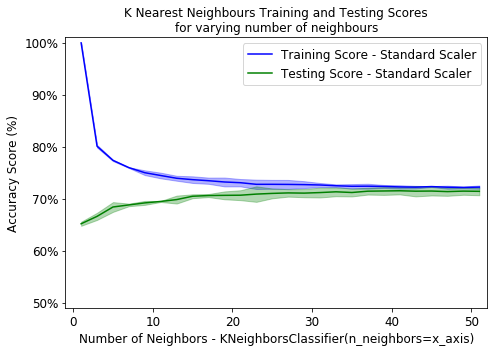

In [16]:
# Matplotlib errorbar will be used to draw the training and testing scores as well as standard deviations
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(k_list, mean_train_scores,
       label="Training Score - Standard Scaler", color="blue")
ax.fill_between(k_list,
                mean_train_scores - 2 * std_train_scores,
                mean_train_scores + 2 * std_train_scores,
                alpha=0.3, color="blue")

ax.plot(k_list, mean_test_scores,
       label="Testing Score - Standard Scaler", color="green")
ax.fill_between(k_list,
                mean_test_scores - 2 * std_test_scores,
                mean_test_scores + 2 * std_test_scores,
                alpha=0.3, color="green")

# Set Title
ax.set_title("K Nearest Neighbours Training and Testing Scores\nfor varying number of neighbours",
             fontsize=12)

# Set X and Y labels
ax.set_ylabel("Accuracy Score (%)", fontsize=12)
ax.set_xlabel("Number of Neighbors - KNeighborsClassifier(n_neighbors=x_axis)", fontsize=12)

# Set X and Y limits
ax.set_xlim(-1, 52)
ax.set_ylim(0.49, 1.01)

# Change the format of the yaxis to percentage
ax.yaxis.set_major_formatter(tick.StrMethodFormatter("{x:.0%}"))

# Change the size of the y and x ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# display the legend
ax.legend(fontsize=12)

# Get a tight layout
plt.tight_layout();

# Save the Image
plt.savefig(os.path.join(
            IMAGES_DIRECTORY, "Training_Testing_Scores-Min_Max_Scaler-1%.png"
            ));

In [17]:
# write the training and testing scores to a csv file
pd.DataFrame(data={
    "k_value" :k_list,
    "Mean_Train_Score":mean_train_scores,
    "Std_Train_Score":std_train_scores,
    "Mean_Test_Score":mean_test_scores,
    "Std_Test_Score":std_test_scores
}).to_csv(os.path.join(ANALYSES_DIRECTORY, "Training_Testing_Scores-Min_Max_Scaler-1%.csv"))

## 4b. KNN Model Refinement
- now lets bring up the full dataset, but lets limit the k values 1 - 21 and only look at 20% of the dataset (for time reasons)

In [18]:
# read the merged DataFrame from .csv.bz2 file into DataFrame
PATH_MERGED_CSV_BZ2 = os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET.csv.bz2")

# pandas DataFrame generated and is referenced by df variable name
df = pd.read_csv(PATH_MERGED_CSV_BZ2,
                 compression='bz2', index_col="INCIDENT_NUM", parse_dates=["DATETIME"])

# display it
with pd.option_context('display.max_columns', None):
    display(df.head())

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,MUN_NAME,CAD_TYPE,CAD_CALL_TYPE,FINAL_TYPE,ALARM_LEVEL,CALL_SOURCE,PERSONS_RESCUED,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342.0,342.0,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.679099,-79.461761,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000011,2011-01-01 00:03:55,5.117,6.183,131.0,131.0,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),former Toronto,Medical,Carbon Monoxide,89 - Other Medical,1,01 - 911,0.0,43.726342,-79.396401,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000012,2011-01-01 00:05:03,4.517,17.617,324.0,324.0,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.668548,-79.335324,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000013,2011-01-01 00:04:46,6.000,9.883,345.0,345.0,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),former Toronto,FIG - Fire - Grass/Rubbish,Emergency Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",1,01 - 911,0.0,43.657123,-79.434313,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000014,2011-01-01 00:06:07,4.933,10.133,142.0,142.0,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),North York,FAHR - Alarm Highrise Residential,Emergency Fire,"33 - Human - Malicious intent, prank",1,05 - Telephone from Monitoring Agency,0.0,43.759840,-79.516182,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0


In [19]:
# get the top 10 FINAL_TYPE
top_10 = [x for x in df["FINAL_TYPE"].value_counts().index[:10]]

# generate the hour of the day (24 hour format) that is rounded
df["HOUR"] = df["DATETIME"].dt.round("D").dt.hour

# slice the dataframe that is a subset of the top 10
# and columns of interest and drop all nulls
df = df.loc[df["FINAL_TYPE"].isin(top_10), ["FINAL_TYPE", "HOUR",
                                            "MINUTES_ARRIVAL", "MINUTES_LEAVE",
                                            "CALL_SOURCE"]].dropna()

# set FINAL_TYPE to be categorical
df["FINAL_TYPE"] = pd.Categorical(df["FINAL_TYPE"])

# also reset the index and remove the INCIDENT_NUM as it is too unique
df.reset_index(inplace=True)
df.drop(columns="INCIDENT_NUM", inplace=True)
# the final dataframe
df

,FINAL_TYPE,HOUR,MINUTES_ARRIVAL,MINUTES_LEAVE,CALL_SOURCE
0,89 - Other Medical,0,6.317,21.267,03 - From Ambulance
1,89 - Other Medical,0,5.117,6.183,01 - 911
2,89 - Other Medical,0,4.517,17.617,03 - From Ambulance
3,"33 - Human - Malicious intent, prank",0,4.933,10.133,05 - Telephone from Monitoring Agency
4,34 - Human - Perceived Emergency,0,7.367,8.417,01 - 911
...,...,...,...,...,...
818794,"33 - Human - Malicious intent, prank",0,4.433,6.817,05 - Telephone from Monitoring Agency
818795,89 - Other Medical,0,5.650,2.667,03 - From Ambulance
818796,89 - Other Medical,0,6.667,4.183,03 - From Ambulance
818797,89 - Other Medical,0,7.717,2.867,03 - From Ambulance


In [20]:
# for a given train / test split observe the opportune k value
# check odd numbered k values
mean_train_scores = []
std_train_scores = []
mean_test_scores = []
std_test_scores = []
k_list = []
for k in range(1, 52, 2):
    k_list.append(k)
    agg_train_scores = []
    agg_test_scores = []
    for random_stat in range(10, 51, 10):
        df_sample = df.sample(100000, random_state=random_stat)
        X, y = ML_IS_FUN.DataFrame_to_X_and_y(df_sample)
        X = pd.get_dummies(X)
        (X_train, X_test,
         y_train, y_test, _) = ML_IS_FUN.Train_Test_Split_and_Scale(features=X, labels=y,
                                                          scaler=ML_IS_FUN.MinMaxScaler(),
                                                          random_state=random_stat,
                                                          test_size=0.25)
        t1 = time.time()
        model = ML_IS_FUN.K_Nearest_Neighbours_Model(train_features=X_train,
                                                 train_labels=y_train,
                                                 k_value=k)
        (train_score,
        test_score,
        train_predict,
        test_predict) = ML_IS_FUN.Scores_And_Predictions(X_train,
                                            y_train,
                                            X_test,
                                            y_test, model,
                                            prediction_flag=False)
        agg_train_scores.append(train_score)
        agg_test_scores.append(test_score)
        print(f"time: {round(time.time() - t1, 2)}, k value: {k}, train score: {train_score}, test score: {test_score}")
        del model, train_score, test_score
    mean_train_scores.append(np.mean(agg_train_scores))
    std_train_scores.append(np.std(agg_train_scores))
    mean_test_scores.append(np.mean(agg_test_scores))
    std_test_scores.append(np.std(agg_test_scores))
    del agg_train_scores, agg_test_scores

time: 44.72, k value: 1, train score: 0.9948133333333333, test score: 0.64936
time: 42.14, k value: 1, train score: 0.9948933333333333, test score: 0.64624
time: 58.3, k value: 1, train score: 0.99424, test score: 0.64976
time: 45.37, k value: 1, train score: 0.9947466666666667, test score: 0.65048
time: 42.81, k value: 1, train score: 0.99448, test score: 0.6494
time: 47.01, k value: 3, train score: 0.7944133333333333, test score: 0.66468
time: 41.75, k value: 3, train score: 0.7936, test score: 0.66352
time: 59.35, k value: 3, train score: 0.79284, test score: 0.66616
time: 50.09, k value: 3, train score: 0.79444, test score: 0.66436
time: 47.09, k value: 3, train score: 0.7939466666666667, test score: 0.66508
time: 50.46, k value: 5, train score: 0.7709733333333333, test score: 0.68168
time: 43.81, k value: 5, train score: 0.77048, test score: 0.68168
time: 60.75, k value: 5, train score: 0.7709466666666667, test score: 0.68684
time: 51.88, k value: 5, train score: 0.771146666666666

In [21]:
# generate numpy arrays
k_list = np.array(k_list)
mean_train_scores = np.array(mean_train_scores)
std_train_scores = np.array(std_train_scores)
mean_test_scores = np.array(mean_test_scores)
std_test_scores = np.array(std_test_scores)

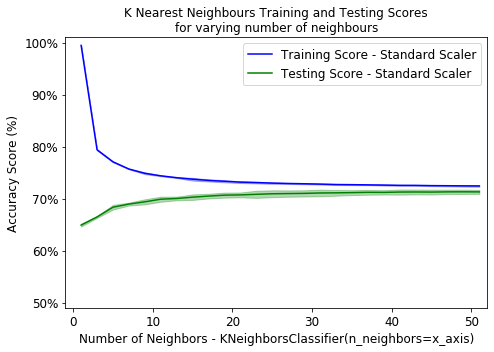

In [22]:
# Matplotlib errorbar will be used to draw the training and testing scores as well as standard deviations
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(k_list, mean_train_scores,
       label="Training Score - Standard Scaler", color="blue")
ax.fill_between(k_list,
                mean_train_scores - 2 * std_train_scores,
                mean_train_scores + 2 * std_train_scores,
                alpha=0.3, color="blue")

ax.plot(k_list, mean_test_scores,
       label="Testing Score - Standard Scaler", color="green")
ax.fill_between(k_list,
                mean_test_scores - 2 * std_test_scores,
                mean_test_scores + 2 * std_test_scores,
                alpha=0.3, color="green")

# Set Title
ax.set_title("K Nearest Neighbours Training and Testing Scores\nfor varying number of neighbours",
             fontsize=12)

# Set X and Y labels
ax.set_ylabel("Accuracy Score (%)", fontsize=12)
ax.set_xlabel("Number of Neighbors - KNeighborsClassifier(n_neighbors=x_axis)", fontsize=12)

# Set X and Y limits
ax.set_xlim(-1, 52)
ax.set_ylim(0.49, 1.01)

# Change the format of the yaxis to percentage
ax.yaxis.set_major_formatter(tick.StrMethodFormatter("{x:.0%}"))

# Change the size of the y and x ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# display the legend
ax.legend(fontsize=12)

# Get a tight layout
plt.tight_layout();

# Save the Image
plt.savefig(os.path.join(
            IMAGES_DIRECTORY, "Training_Testing_Scores-Min_Max_Scaler-10%.png"
            ));

In [23]:
# write the training and testing scores to a csv file
pd.DataFrame(data={
    "k_value" :k_list,
    "Mean_Train_Score":mean_train_scores,
    "Std_Train_Score":std_train_scores,
    "Mean_Test_Score":mean_test_scores,
    "Std_Test_Score":std_test_scores
}).to_csv(os.path.join(ANALYSES_DIRECTORY, "Training_Testing_Scores-Min_Max_Scaler-10%.csv"))

In [24]:
# For the full dataset lets look at a k value of 15
X, y = ML_IS_FUN.DataFrame_to_X_and_y(df)
X = pd.get_dummies(X)
(X_train, X_test,
 y_train, y_test, _) = ML_IS_FUN.Train_Test_Split_and_Scale(features=X, labels=y,
                                                  scaler=ML_IS_FUN.MinMaxScaler(),
                                                  random_state=42,
                                                  test_size=0.25)
t1 = time.time()
model = ML_IS_FUN.K_Nearest_Neighbours_Model(train_features=X_train,
                                         train_labels=y_train,
                                         k_value=15)
(train_score,
test_score,
train_predict,
test_predict) = ML_IS_FUN.Scores_And_Predictions(X_train,
                                    y_train,
                                    X_test,
                                    y_test, model,
                                    prediction_flag=False)
print("Time: ", round(time.time() - t1, 2))
print("Training Score: ", train_score)
print("Testing Score: ", test_score)

Time:  2144.54
Training Score:  0.7373941335191883
Testing Score:  0.70133365901319


In [26]:
pd.DataFrame(data={
    "k_value" :[15],
    "Train_Score":[train_score],
    "Test_Score":[test_score]
}).to_csv(os.path.join(ANALYSES_DIRECTORY, "Training_Testing_Scores-Min_Max_Scaler.csv"))

### It appears that to predict the TFS Incident Type (top 10 FINAL_TYPE) one can receive a 74% training score and 70% testing score if exploring the following features (HOUR_OF_DAY, MINUTES_ARRIVAL, MINUTES_LEAVE and CALL_SOURCE)
- If I had access to more resources I could expand this KNN model to include more features and to test the whole dataset instead of a slice of it
- the whole dataset takes ~1.5 hours to generate the model and to make predictions

# 5. Jupyter Notebook References

[1] "Python Documentation."  *Python Software Foundation*.  [Online](https://docs.python.org/).  [Accessed August 04, 2020]

[2] G. Niemeyer.  "dateutil - powerful extensions to datetime."  *dateutil*.  [Online](https://github.com/dateutil/dateutil).  [Accessed August 04, 2020]

[3] "pandas."  *PyData*.  [Online](https://pandas.pydata.org/).  [Accessed August 04, 2020]

[4] "NumPy - The fundamental package for scientific computing with Python."  *NumPy*.  [Online](https://numpy.org/).  [Accessed August 04, 2020]

[5] "Matplotlib:  Visualization with Python."  *The Matplotlib Development team*.  [Online](https://matplotlib.org/).  [Accessed August 04, 2020]

[6] Pedregosa et al.  "Scikit-learn:  Machine Learning in Python."  *Scikit-learn*.  [Online](https://scikit-learn.org/).  [Accessed August 04, 2020]